In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib notebook

In [2]:
def get_data(data_path, JD):
    
    files = sorted(glob.glob(data_path+JD+'/*'))
    data = []
    for file in files:
        infile = open(file, 'rb')
        data.append(pickle.load(infile))
        infile.close()
    return data, files
def get_power(data_real, data_image=None):
    if data_image is not None:
        data = data_real+ 1.0j*data_image
    else:
        data = data_real
    return np.abs(np.fft.fft(data)**2)

def get_fft(data_real, data_image=None):
    if data_image is None:
        return np.fft.fft(data_real)
    else:
        return np.fft.fft(data_real+1.0j*data_image)
    
def get_times_and_freqs(N, sample_rate):
    times = np.linspace(0, N/sample_rate, N)
    freqs = np.fft.fftfreq(len(times), np.mean(np.diff(times)))
    return times, freqs

In [3]:
# put the path to the data folder here including the JD
path = '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/'

In [4]:
# Now import the data by day for example the ssb test signals are on day 245890
JD = '2458902'

# we can import all data from the day using the get_data() function
caps, cap_files               =  get_data(path+'captures/', JD)
args, _                       =  get_data(path+'args/', JD)
coords, _                     =  get_data(path+'coordinates/', JD)
power, files                  =  get_data(path+'power/', JD)

In [5]:
cap_files

['/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_0-35_test_1_onband',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_0-37_test_upper',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_0-38_test_lower',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_5-08_s_on_test',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_5-09_s_off_test',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_5-19_s_off_test',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_5-19_s_on_test',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_5-89_s_on_test_1230',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/cap_5-9_s_off_1225',
 '/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/power_off',
 '/home/maxlee19

In [289]:
power[-1]

In [6]:
real_on = np.asarray(caps[0]['real'])
real_off = np.asarray(caps[1]['real'])
imaginary_on = np.asarray(caps[0]['imaginary'])
imaginary_off = np.asarray(caps[1]['imaginary'])

In [7]:
times, freqs = get_times_and_freqs(15800, 62.5e6/15)

In [8]:
power_on = np.median(np.abs(np.fft.fft(real_on+1.0j*imaginary_on, axis=1))**2, axis=0)
power_off = np.median(np.abs(np.fft.fft(real_off+1.0j*imaginary_off, axis=1))**2, axis=0)

In [9]:
power_on = np.median(power_on.reshape(1975, 8), axis=1)
power_off = np.median(power_off.reshape(1975, 8), axis=1)

In [10]:
times, freqs = get_times_and_freqs(1975, 62.5e6/15)

In [11]:
15800/8

1975.0

In [12]:
62.5e6/15/15800*5

1318.5654008438817

<IPython.core.display.Javascript object>


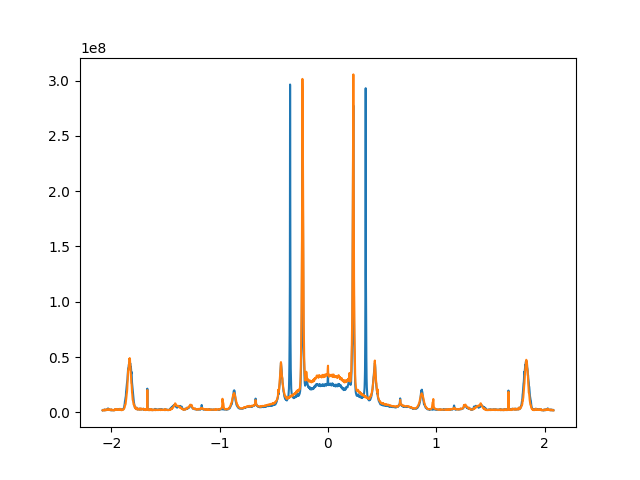

In [13]:
plt.figure()
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_on))
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_off))

<IPython.core.display.Javascript object>


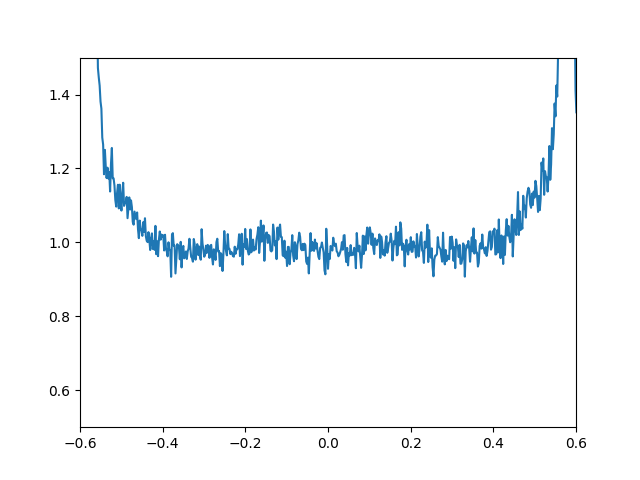

(-0.6, 0.6)

In [116]:
plt.figure()
plt.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_off/power_on))
plt.ylim(.5,1.5)
plt.xlim(-.6, .6)

In [311]:
infile = open('/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/power_on', 'rb')
s_off = pickle.load(infile)
infile.close()
infile = open('/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/power_off', 'rb')
s_on = pickle.load(infile)
infile.close()


infile = open('/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/power_on_1230', 'rb')
s_on_1230 = pickle.load(infile)
infile.close()
infile = open('/home/maxlee1993/Documents/radio_lab/Radio_lab/Lab_2/data/captures/2458902/power_off_1225', 'rb')
s_off_1225 = pickle.load(infile)
infile.close()

In [312]:
power_on_1231 = np.median(s_on.reshape(1580, 10), axis=1)  #PEAK AT -.6
power_off_1229 = np.median(s_off.reshape(1580, 10), axis=1) #peak at 1.4

power_on_1230 = np.median(s_on_1230.reshape(1580, 10), axis=1)  #peak at .4
power_off_1225 = np.median(s_off_1225.reshape(1580, 10), axis=1) #no peak

In [313]:
15800/8

1975.0

In [314]:
times, freqs = get_times_and_freqs(1580, 62.5e6/15)

In [327]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0})
ax1.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_on_1231), label='s_on 1231MHz')
ax1.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_off_1229), label='s_off 1229MHz')

ax2.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_on_1230), label='s_on 1230MHz')
ax2.semilogy(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_off_1225), label='s_off 1225MHz')
plt.xlim(-1, 1)
ax1.legend()
ax2.legend()

plt.savefig('s_on_s_off')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


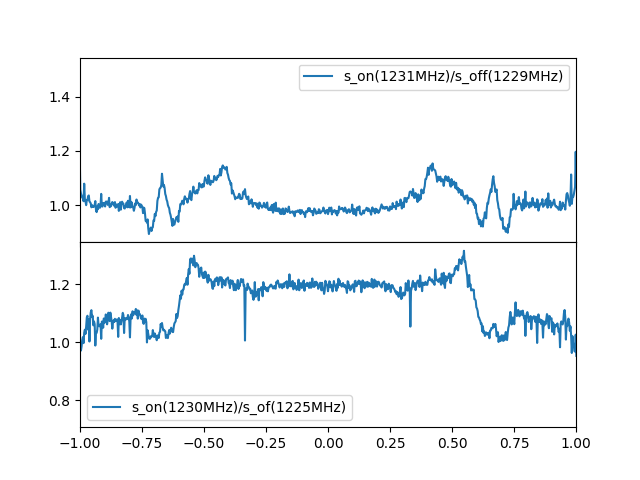

(-1, 1)

In [326]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'hspace':0})
ax1.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_on_1231/power_off_1229), label='s_on(1231MHz)/s_off(1229MHz)')
ax2.plot(np.fft.fftshift(freqs/1e6), np.fft.fftshift(power_on_1230/ power_off_1225), label=('s_on(1230MHz)/s_of(1225MHz)'))
ax1.legend()
ax2.legend()
plt.savefig('our_try')
plt.xlim(-1, 1)
# plt.ylim(.8, 1.2)

In [264]:
5.73*12/np.pi

21.88698777399745